In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)

    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    r=rgb[:,:,0]
    g=rgb[:,:,1]
    b=rgb[:,:,2]
    bgr=np.dstack((b,g,r))
    return np.uint8(bgr)

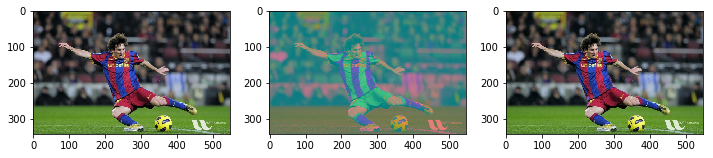

In [18]:
img = cv2.imread("../data/messi5.jpg")
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(rgb2ycbcr(img))
plt.subplot(133)
plt.imshow(ycbcr2rgb(rgb2ycbcr(img)))
plt.show()

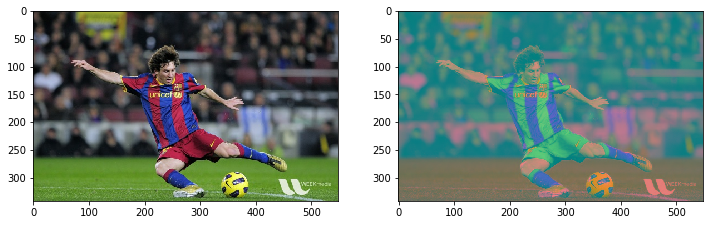

In [7]:
img = cv2.imread("../data/messi5.jpg")
ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(ycbcr)
plt.show()

---


In [38]:
def int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.
        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return ('{0:08b}'.format(r),
                '{0:08b}'.format(g),
                '{0:08b}'.format(b))
    
def chnbits(i1, str1):
    #print(i1)
    i1bin = ("{0:08b}".format(i1))
    #print(i1bin)
    result = i1bin[:4] + str1
    #print(result)
    return result

def bin4bits(i1):
    
    i1bin = ("{0:08b}".format(i1))
    return(i1bin[4:])

def bin2int(bin1):
    return(int(bin1, 2))

def ycbcr_merge(img1, img2):
    
    "convered data into string format"
    img2 = (img2*255).astype('uint8')
    str1 = ""
    str1 = "" + ("{0:016b}".format(img2.shape[0])) + ("{0:016b}".format(img2.shape[1]))
    #print(str1)
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            rgb_bin_tuple = int_to_bin(tuple(img2[i][j]))
            str1  = str1 + rgb_bin_tuple[0][:4] + rgb_bin_tuple[1][:4] + rgb_bin_tuple[2][:4]
            #print(tuple(img_bird[0][0]), rgb_bin_tuple, str1)

    #print("str1 :", str1[:32],len(str1))
    
    "get ycbcr image of cover image"
    ycbcr = rgb2ycbcr(img1)
    I1 = ycbcr[:, :, 1]
    #cb = (cb - cb.min())/(cb.max() - cb.min())
    #I1 = (cb*255).astype("uint8")
    #I1 = (I*255).astype("uint8")
    
    "Change bits from I channel"
    I1bin = np.empty(I1.shape)
    str_idx = 0
    for i in range((I1.shape[0])):
        for j in range((I1.shape[1])):
            if(str_idx < len(str1)):
                #if(i==0 and j<8):
                    #print(i, j, (chnbits(I1[i,j], str1[str_idx:str_idx+4])))
                I1bin[i, j] = bin2int(chnbits(I1[i,j], str1[str_idx:str_idx+4]))
                str_idx = str_idx + 4
            else:
                I1bin[i, j] = I1[i, j]
                #I1bin[i, j] = bin2int(chnbits(I1[i,j], "0000"))
    
    #for j in range(8):
    #    print("{0:08b}".format(int(I1bin[0, j])))
    #plt.figure(figsize = (12, 9))
    #plt.subplot(121)
    #plt.imshow(I1bin)
    #plt.title("Bin changed")
    print(I1bin)
    
    #I1bin = (I1bin - I1bin.min())/(I1bin.max() - I1bin.min())
    #I1bin = I1bin * 360
            
    #I1bin_norm = (I1bin - I1bin.min())/(I1bin.max() - I1bin.min())
    y, cb , cr = ycbcr[:, : ,0], ycbcr[:, : ,1], ycbcr[:, : ,2]
    ycbcr_ch = np.dstack((y, I1bin, cr))
    
    return ycbcr2rgb(ycbcr_ch)

In [41]:
def merge(img1, img2):
    
    merged_image1 = ycbcr_merge(img1, img2)
    #merged_image1 = (merged_image - merged_image.min())/(merged_image.max() - merged_image.min())
    
    plt.figure(figsize= (16, 12))
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title("Cover Image")
    
    plt.subplot(132)
    plt.imshow(img2)
    plt.title("Image to hide")
    
    plt.subplot(133)
    plt.imshow(merged_image1)
    plt.title("Stego Image")
    plt.show()
    return merged_image1

[[128. 128. 136. ... 123. 120. 116.]
 [139. 137. 132. ... 113. 113. 113.]
 [129. 129. 129. ... 139. 134. 141.]
 ...
 [120. 120. 119. ... 119. 119. 119.]
 [121. 120. 119. ... 120. 121. 120.]
 [121. 120. 119. ... 121. 121. 121.]]


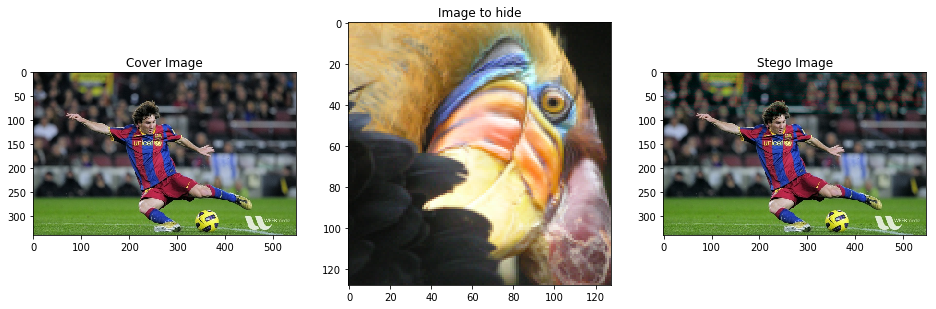

In [42]:
stego_img3 = merge(cv2.imread("../data/messi5.jpg"), plt.imread("../data/bird_small.png"))

In [54]:
def str2img(string, row, col):
    
    str_idx = 0
    img = np.empty([row*col, 3])
    
    for i in range(row*col):
        
        rgb = string[str_idx:str_idx+12]
        r, g, b = rgb[:4] + "0000", rgb[4:8] + "0000", rgb[8:] + "0000"
        img[i, 0], img[i, 1], img[i, 2] = int(r,2), int(g,2), int(b,2) 
        
        str_idx = str_idx + 12
        
    return (np.reshape(img, [row, col, 3])) #128*128

def get_dim(I1):
    
    #for j in range(8):
    #    print("{0:08b}".format(I1[0, j]))

    #print((bin4bits(I1[0, 0]) + bin4bits(I1[0, 1]) + bin4bits(I1[0, 2]) + bin4bits(I1[0, 3])))
    #print((bin4bits(I1[0, 4]) + bin4bits(I1[0, 5]) + bin4bits(I1[0, 6]) + bin4bits(I1[0, 7])))
    row = int((bin4bits(I1[0, 0]) + bin4bits(I1[0, 1]) + bin4bits(I1[0, 2]) + bin4bits(I1[0, 3])), 2)
    col = int((bin4bits(I1[0, 4]) + bin4bits(I1[0, 5]) + bin4bits(I1[0, 6]) + bin4bits(I1[0, 7])), 2)
    #print(row, col)
    return row, col


def ycbcr_unmerge(stego_img):
    
    ycbcr = rgb2ycbcr(cv2.cvtColor(stego_img, cv2.COLOR_RGB2BGR))
    I1 = ycbcr[:, :, 1]
    print(I1)
    #I1 = (np.ceil(I*255)).astype('uint8')
    #I1
    row, col = get_dim(I1)
    str1 = ""
    strlen = row*col*12
    #print(strlen)
    for i in range(I1.shape[0]):
        if(i==0):
            for j in range(8, I1.shape[1]):
                if(len(str1) < strlen):
                    str1 = str1 + bin4bits(I1[i, j])
        else:
            for j in range(I1.shape[1]):
                if(len(str1) < strlen):
                    str1 = str1 + bin4bits(I1[i, j])

    #print(len(str1))
    img_rcv = str2img(str1, row, col)
    img_rcv_norm = (img_rcv - img_rcv.min())/(img_rcv.max() - img_rcv.min())
    return img_rcv_norm

def unmerge(stego_img):
    
    img2 = ycbcr_unmerge(stego_img)
    plt.figure(figsize= (12, 9))

    #stego_img_norm = (stego_img - stego_img.min())/(stego_img.max() - stego_img.min())
    #img2_norm = (img2 - img2.min())/(img2.max() - img2.min())
    
    plt.subplot(121)
    plt.imshow(stego_img)
    plt.title("Stego Image")
    
    plt.subplot(122)
    plt.imshow(img2)
    plt.title("hidden Image")


    plt.show()
    return img2

[[128 128 136 ... 123 119 115]
 [139 136 132 ... 113 113 113]
 [129 129 129 ... 138 133 141]
 ...
 [119 119 119 ... 119 119 119]
 [120 120 119 ... 119 120 119]
 [120 120 119 ... 120 120 120]]


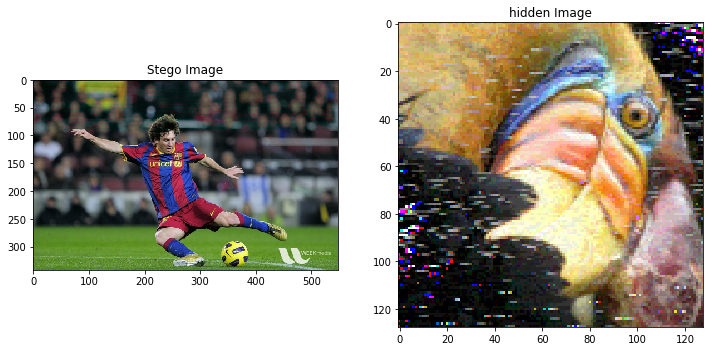

In [50]:
unmerge(stego_img3)

---
cr channel

In [51]:
def int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.
        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return ('{0:08b}'.format(r),
                '{0:08b}'.format(g),
                '{0:08b}'.format(b))
    
def chnbits(i1, str1):
    #print(i1)
    i1bin = ("{0:08b}".format(i1))
    #print(i1bin)
    result = i1bin[:4] + str1
    #print(result)
    return result

def bin4bits(i1):
    
    i1bin = ("{0:08b}".format(i1))
    return(i1bin[4:])

def bin2int(bin1):
    return(int(bin1, 2))

def ycbcr_merge_cr(img1, img2):
    
    "convered data into string format"
    img2 = (img2*255).astype('uint8')
    str1 = ""
    str1 = "" + ("{0:016b}".format(img2.shape[0])) + ("{0:016b}".format(img2.shape[1]))
    #print(str1)
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            rgb_bin_tuple = int_to_bin(tuple(img2[i][j]))
            str1  = str1 + rgb_bin_tuple[0][:4] + rgb_bin_tuple[1][:4] + rgb_bin_tuple[2][:4]
            #print(tuple(img_bird[0][0]), rgb_bin_tuple, str1)

    #print("str1 :", str1[:32],len(str1))
    
    "get ycbcr image of cover image"
    ycbcr = rgb2ycbcr(img1)
    I1 = ycbcr[:, :, 2]
    #cb = (cb - cb.min())/(cb.max() - cb.min())
    #I1 = (cb*255).astype("uint8")
    #I1 = (I*255).astype("uint8")
    
    "Change bits from I channel"
    I1bin = np.empty(I1.shape)
    str_idx = 0
    for i in range((I1.shape[0])):
        for j in range((I1.shape[1])):
            if(str_idx < len(str1)):
                #if(i==0 and j<8):
                    #print(i, j, (chnbits(I1[i,j], str1[str_idx:str_idx+4])))
                I1bin[i, j] = bin2int(chnbits(I1[i,j], str1[str_idx:str_idx+4]))
                str_idx = str_idx + 4
            else:
                I1bin[i, j] = I1[i, j]
                #I1bin[i, j] = bin2int(chnbits(I1[i,j], "0000"))
    
    #for j in range(8):
    #    print("{0:08b}".format(int(I1bin[0, j])))
    #plt.figure(figsize = (12, 9))
    #plt.subplot(121)
    #plt.imshow(I1bin)
    #plt.title("Bin changed")
    print(I1bin)
    
    #I1bin = (I1bin - I1bin.min())/(I1bin.max() - I1bin.min())
    #I1bin = I1bin * 360
            
    #I1bin_norm = (I1bin - I1bin.min())/(I1bin.max() - I1bin.min())
    y, cb , cr = ycbcr[:, : ,0], ycbcr[:, : ,1], ycbcr[:, : ,2]
    ycbcr_ch = np.dstack((y, cb, I1bin))
    
    return ycbcr2rgb(ycbcr_ch)

[[128. 128. 136. ... 123. 120. 116.]
 [139. 137. 132. ... 113. 113. 113.]
 [129. 129. 129. ... 139. 134. 141.]
 ...
 [120. 120. 119. ... 119. 119. 119.]
 [121. 120. 119. ... 120. 121. 120.]
 [121. 120. 119. ... 121. 121. 121.]]


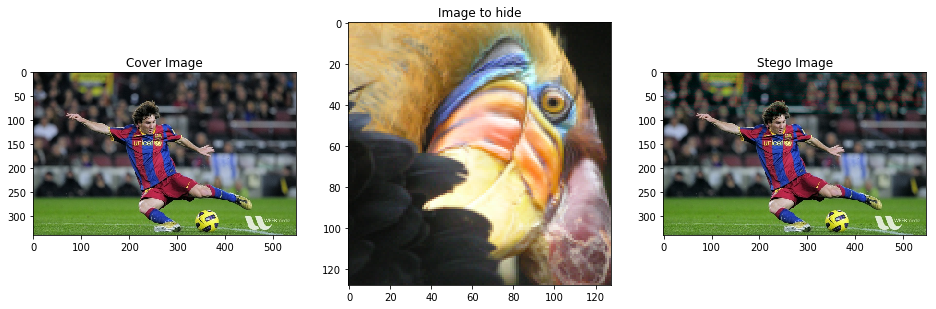

In [52]:
stego_img4 = merge(cv2.imread("../data/messi5.jpg"), plt.imread("../data/bird_small.png"))

[[128 128 136 ... 123 119 115]
 [139 136 132 ... 113 113 113]
 [129 129 129 ... 138 133 141]
 ...
 [119 119 119 ... 119 119 119]
 [120 120 119 ... 119 120 119]
 [120 120 119 ... 120 120 120]]


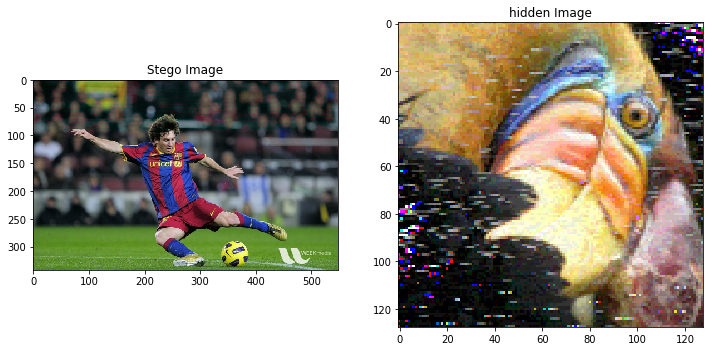

In [55]:
msg_img = unmerge(stego_img4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


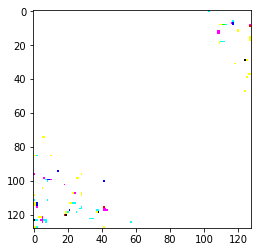

In [72]:
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(msg_img,-1,kernel)
plt.imshow(dst)

In [61]:
cv2.medianBlur(msg_img*255,5)

error: OpenCV(4.4.0) C:/Users/appveyor/AppData/Local/Temp/1/pip-req-build-sxpsnzt6/opencv/modules/imgproc/src/median_blur.simd.hpp:975: error: (-210:Unsupported format or combination of formats)  in function 'cv::opt_AVX2::medianBlur'


In [65]:
blur = cv2.GaussianBlur(msg_img,(3,3),0)

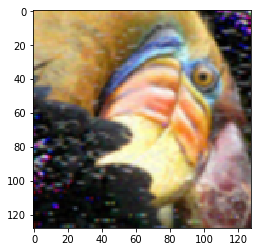

In [66]:
plt.imshow(blur)